In [1]:
from plot import *
from gen import *
from load_data import *  
from func_tools import *
from AGM import *
from GM import *
from BFGS import *
from LBFGS import *

import warnings
warnings.filterwarnings('ignore')

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:180: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(_ld(-112)),
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:81: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:82: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  _epsneg_f80 = exp2(_ld(-64))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  _tiny_f80 = exp2(_ld(-16382))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(_ld(-63)),
C:\Users\15161\Anaconda3\lib\site-package

In [2]:
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})

## Load Real Data

In [36]:
points,wine_label = load_wine_dense()
# points,vowel_label = load_vowel_dense()

## AGM

In [29]:
lbd = 0.05
delta = 1e-3
n = len(points)
step = step_size(n,lbd,delta)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)

In [13]:
ans,AGM_loss = AGM(grad,points,step,0.001)

In [46]:
groups = get_group(ans, tol=0.0001)

In [80]:
len(AGM_loss)

347

## GM

In [30]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans2,GM_loss = GM(points,func,grad,0.001)

In [24]:
groups = get_group(ans2, tol=0.0001)

In [25]:
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0.5,0,'Iters')

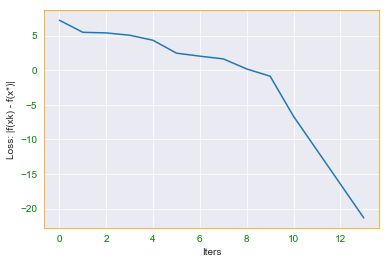

In [31]:
plt.plot(np.log(GM_loss - GM_loss[len(GM_loss)-1]))
plt.ylabel("Loss: |f(xk) - f(x*)|")
plt.xlabel("Iters")

## GM_BB

In [32]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_BB,GM_BB_loss = GM_BB(points,func,grad,0.001)

In [19]:
groups = get_group(ans_BB, tol=0.0001)

In [20]:
groups

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  4,  4,  0,  5,  0,  6,  7,  0,
        4,  8,  9, 10, 11, 12, 13, 14,  0, 15, 16, 17,  0,  0,  0,  4,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 18, 19,  0,  5, 20,  0,  0,
        0,  0,  0, 21,  0,  0,  0,  0, 22,  0, 23,  0,  0, 24,  0,  0, 25,
        0,  0, 26, 17, 27, 28,  0,  0, 29,  0,  0,  4,  4,  4,  4,  4,  4,
       30, 31,  4,  4,  4,  4,  4,  4,  4,  4, 32,  4,  4,  4,  4,  4, 33,
        4,  4,  4,  4, 34, 35, 35,  4,  4,  4,  4,  4,  4,  4,  4,  4, 36,
        4,  4,  4,  4,  4,  4,  4,  4])

In [34]:
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})

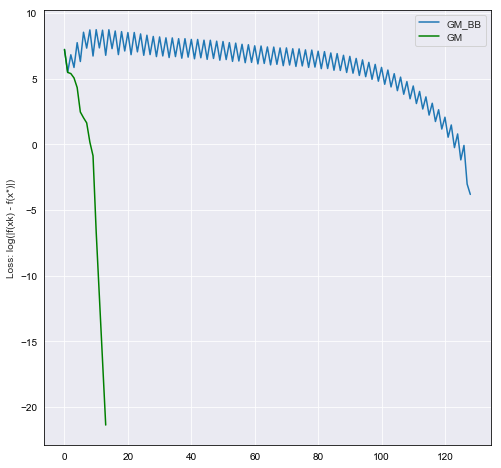

In [35]:
plt.figure(figsize=(8,8))
plt.ylabel("Loss: log(|f(xk) - f(x*)|)")
plt.plot(np.log(GM_BB_loss - GM_BB_loss[len(GM_BB_loss)-1]),label="GM_BB")
plt.plot(np.log(GM_loss - GM_loss[len(GM_loss)-1]),color="green",label="GM")
plt.legend()
plt.savefig("D:\Study\MDS\Term 1\Optimization\Final\Figure\BB_GM_wine_Loss")
plt.show()

## BFGS

In [ ]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_BFGS,BFGS_loss = BFGS(points,func,grad,0.003)

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(BFGS_loss - BFGS_loss[len(BFGS_loss)-1]))
plt.show()

## L-BFGS

In [37]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_LBFGS,LBFGS_loss = LBFGS(points,func,grad,0.005,1,5)

alpha: 0.5
alpha: 0.25
step_size: 0.25
s.T.dot(y): 2593.6525538780975
Iter: 0
norm_2:  90.70565123072659
alpha: 0.5
step_size: 0.5
s.T.dot(y): 765.5737735462696
Iter: 1
norm_2:  85.41973602225413
alpha: 0.5
alpha: 0.25
step_size: 0.25
s.T.dot(y): 36.60431763785882
Iter: 2
norm_2:  77.46735166399904
step_size: 1
s.T.dot(y): 1.587763765166415
Iter: 3
norm_2:  77.10708113245919
step_size: 1
s.T.dot(y): 0.2024987151016214
Iter: 4
norm_2:  76.97527818228862
step_size: 1
s.T.dot(y): 0.017621515856358145
Iter: 5
norm_2:  76.99609313523159
step_size: 1
s.T.dot(y): 230.18984543406756
Iter: 6
norm_2:  63.84305814494382
alpha: 0.5
alpha: 0.25
step_size: 0.25
s.T.dot(y): 12.394149924114242
Iter: 7
norm_2:  76.78655541700783
alpha: 0.5
step_size: 0.5
s.T.dot(y): 0.3495888498728381
Iter: 8
norm_2:  77.02122958518159
alpha: 0.5
step_size: 0.5
s.T.dot(y): 0.1609284532554358
Iter: 9
norm_2:  77.50806093229242
alpha: 0.5
step_size: 0.5
s.T.dot(y): 0.36000684484842665
Iter: 10
norm_2:  77.6141602918559
a

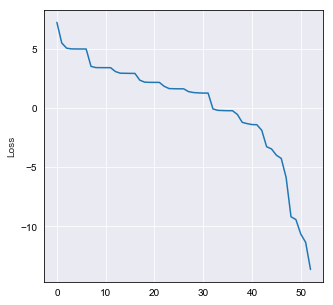

In [38]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(LBFGS_loss - LBFGS_loss[len(LBFGS_loss)-1]))
plt.show()